# Week 7 - Recap random variables

### Discrete random variables: Coin flip example 

Assume that you have a coin which shows on one side 0 and on the other 1. Let $X$ be the random variable to represent the outcome of the coin flip. Further, let $\theta$ be the probability for the coin to land on the side showing 1. We then call
$$
f(x) = \begin{cases}
\theta & \text{for } x=1 \\
1 - \theta  & \text{for } x=0
\end{cases}
$$
the probability mass function of the random variable $X$. You'll often see people writing
$$
X \sim f(x)
$$
which is read as; "X has probability distribution of $f(x)$".

Sometimes it is convenient to use $f(x; \theta)$ instead of $f(x)$ to express that the probability mass function depends on the $\textbf{parameter}$ $\theta$. 

We can also use $P[X = 0]$ to denote the probability of the random variable to be equal to 0. $P[X = 1]$ is then the probability of the random variable to be equal to 1. 

Now let's assume that you forgot if the coin is fair $(\theta = 0.5)$ or not $(\theta \neq 0.5)$. You decide to carry out an experiment to $\textbf{estimate}$ the parameter $\theta$. Your idea is to flip the coin $N$ times. You then plan to use the $\text{empirical}$ average of the samples as an $\textbf{estimate}$ for the $\textbf{parameter}$ $\theta$. 

Let 
$$
X = X_1,X_2, \dots, X_n \overset{iid}{\sim} f(x; \theta)
$$
denote the sequence of $N$ $\textbf{independently}$ and $\textbf{identically}$ distributed (iid) random variables with probability mass function $f(x; \theta)$.
Further let 
$$
x = x_1, x_2, \dots, x_N 
$$
be realisations (or a sample) of your experiment.  

Your estimate of the population parameter $\theta$ is then obtained as
$$
\hat{\theta} = \frac{1}{N} \sum_{i=1}^N x_i
$$
where in statistics and machine learning $\hat{\ }$ (pronounced as hat) is used to denote an estimate.

The following code simulates this experiment! 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

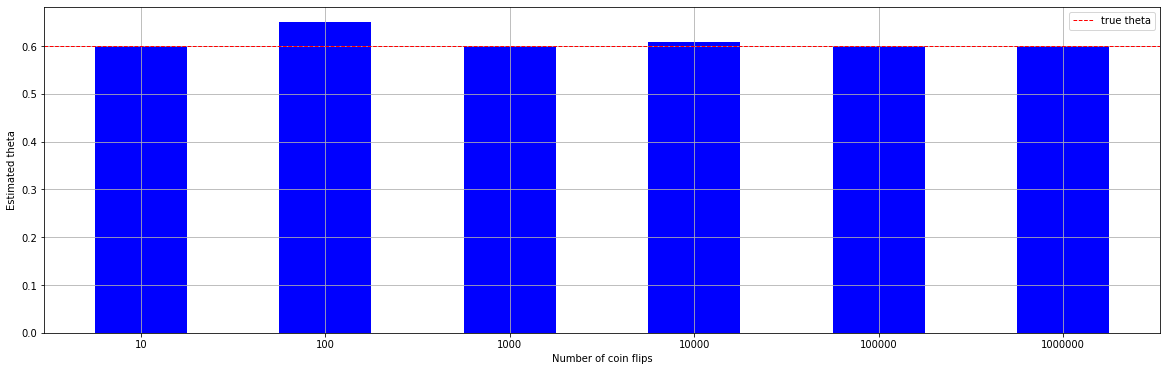

In [4]:
np.random.seed(10)
N_range = np.array([1e1, 1e2, 1e3, 1e4,1e5, 1e6]).astype(int)  # number of random coin flips (N in the previous text)

fig, ax = plt.subplots(figsize=(20, 6))
theta = 0.6  # P[X=1] = theta 

bar_width = 0.5
x_pos = np.array([0, 2])
for i, N in enumerate(N_range): 
    x = np.random.binomial(1, theta, N)  # simulate coin flips
    theta_hat = np.mean(x)
    ax.bar(i, theta_hat, width=bar_width, color="blue")

ax.axhline(theta, linestyle='--', c="red", linewidth=1, label="true theta")
ax.legend()
ax.set_xticks(np.arange(len(N_range)))
ax.set_xticklabels(N_range)
ax.set_xlabel("Number of coin flips")
ax.set_ylabel("Estimated theta")
ax.grid(which="both")

### Continuous random variables: Normal distribution

The Normal (or Gaussian) distribution is very popular within statistics/machine learning. The probability density function is given as
$$
f(x; \bf{\theta}) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{1}{2} \frac{(x - \mu)^2}{\sigma^2}} ,
$$
where $\bf{\theta} = (\mu, \sigma^2)$. The probability density function describes the infinitesimal probability of the random variable $X$ being equal to $x$. It's very important to understand that $f(x)$ does not return the probability (e.g. $P[X =x]$) for continuous random variables. The probability for a continuous random variable to be equal to a specific value is by convention 0. Instead, one usually ask for the probability to be within a certain interval ($P[X < x]$), which is obtained by using the cumulative distribution function.  

Usually the following notation is used to denote that a random variable is normal distributed:
$$
X \sim N(\mu, \sigma^2), 
$$
where the density function is parametrized with the variance $(\sigma^2)$. Some people and computing packages (like Numpy) use the standard deviation ($\sigma$; e.g. the square-root of the variance) to parametrize the density function. 

Let's assume that you have a sample of $N$ independently and identically distributed (iid) normal random variables ($x = x_1, x_2, \dots x_N$). 

Further, assume that you want to find an estimate for the population mean (parameter $\mu$ of the density function). You're idea is to use again the empirical mean of your data sample. 

Have a look at the following code. The idea of the code is to repeatedly simulate realisations of length $N$. For each realisation the empirical mean and median are calculated as estimates for the population mean 

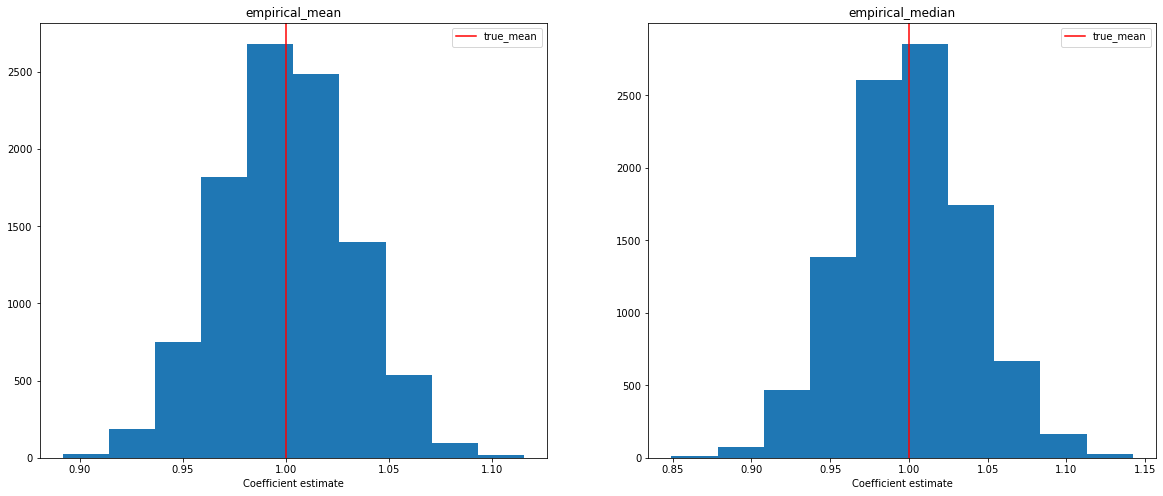

In [60]:
M = 10000  # number of realisations 
N = 1000  # sample size of each realisation

true_mean = 1  # mean of distribution
estimates = {"empirical_mean":[], "empirical_median": []}

for m in range(M):
    x = np.random.normal(loc=true_mean, scale=1, size=N) # simulate realisations
    estimates["empirical_mean"].append(np.mean(x))  # calculate mean
    estimates["empirical_median"].append(np.median(x)) # calculate median
    
fig, ax = plt.subplots(ncols=2, figsize=(20,8))
for i, key in enumerate(estimates.keys()):
    ax[i].hist(estimates[key])
    ax[i].axvline(true_mean, c="red", label="true_mean")
    ax[i].legend()
    ax[i].set_title(key)
    ax[i].set_xlabel("Coefficient estimate")

It seems that the empirical mean and median are equally "good" at estimating the true population mean. But what happens in case the random variable is distributed according to an exponential distribution
$$
X \sim \lambda e^{-\lambda x} , 
$$
where $\lambda$ is the rate parameter of the distribution. 

The following code uses the empirical mean and median to estimate the rate parameter $\lambda$ of the distribution. 

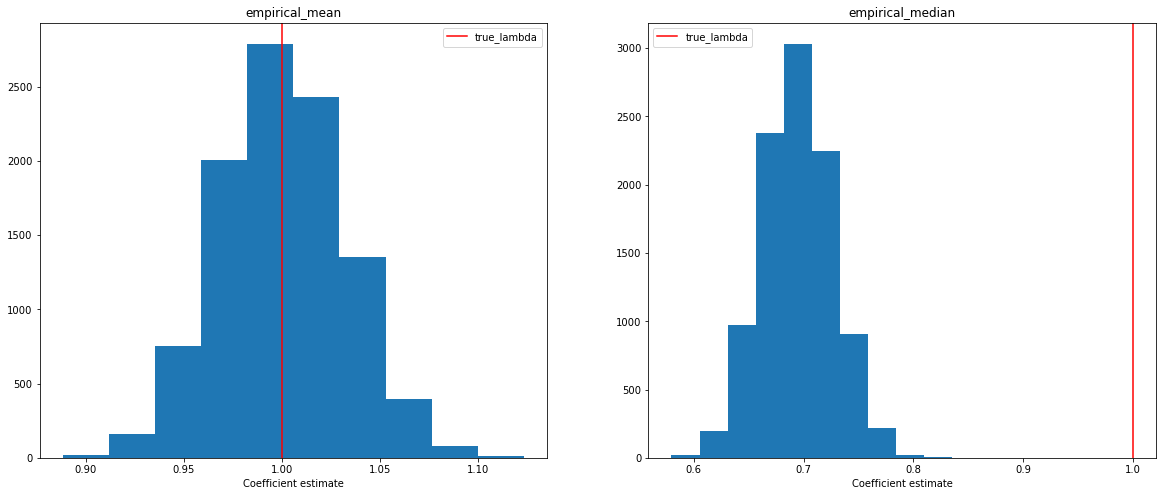

In [61]:
_lambda = 1  # true rate parameter of the distribution
estimates = {"empirical_mean":[], "empirical_median": []}

for m in range(M):
    x = np.random.exponential(scale=_lambda, size=N)
    estimates["empirical_mean"].append(np.mean(x))  # calculate mean
    estimates["empirical_median"].append(np.median(x)) # calculate median
    
fig, ax = plt.subplots(ncols=2, figsize=(20,8))
for i, key in enumerate(estimates.keys()):
    ax[i].hist(estimates[key])
    ax[i].axvline(true_mean, c="red", label="true_lambda")
    ax[i].legend(); ax[i].set_title(key)
    ax[i].set_xlabel("Coefficient estimate")

Is the median still a good estimator for the parameter $\lambda$? Have a look at the following wikipedia article to understand why this is the case (https://en.wikipedia.org/wiki/Exponential_distribution) 